# Energy Efficiency

## Description: Multi-Linear and Polynomial Regression on the Energy Efficiency Dataset In this assignment, you will perform multi-linear and polynomial regression on the Energy Efficiency dataset to predict the heating load (y1) of buildings. Follow the instructions below:

### Tasks:

### 1. Load the Energy Efficiency dataset using the pandas library.

### ● Dataset Name: Energy Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
data = pd.read_excel("Energy Dataset.xlsx")

In [3]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Heating Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [4]:
data.shape

(768, 9)

### 2. Apply necessary preprocessing steps on the dataset, such as handling missing values, scaling features, or encoding categorical variables if required.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X1            768 non-null    float64
 1   X2            768 non-null    float64
 2   X3            768 non-null    float64
 3   X4            768 non-null    float64
 4   X5            768 non-null    float64
 5   X6            768 non-null    int64  
 6   X7            768 non-null    float64
 7   X8            768 non-null    int64  
 8   Heating Load  768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [6]:
# Checking Null Values

data.isnull().sum()

X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
Heating Load    0
dtype: int64

In [7]:
# Scaling --> Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in data.columns:
    # Extract the column and reshape it to a 2D array
    column_data = data[col].values.reshape(-1, 1)
    
    # Fit and transform the 2D array
    data[col] = scaler.fit_transform(column_data)

In [8]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Heating Load
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575,-0.670115
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575,-0.670115
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575,-0.670115
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575,-0.670115
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575,-0.145503


### 3. Separate the features (X) and the target variable (y: heating load) from the dataset

In [9]:
X = data.drop('Heating Load', axis=1)
y = data['Heating Load']

In [10]:
X

,X1,X2,X3,X4,X5,X6,X7,X8
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575
...,...,...,...,...,...,...,...,...
763,-1.174613,1.275625,0.561951,0.972512,-1.0,1.341641,1.244049,1.411336
764,-1.363812,1.553943,1.123903,0.972512,-1.0,-1.341641,1.244049,1.411336
765,-1.363812,1.553943,1.123903,0.972512,-1.0,-0.447214,1.244049,1.411336
766,-1.363812,1.553943,1.123903,0.972512,-1.0,0.447214,1.244049,1.411336


In [11]:
y

0     -0.670115
1     -0.670115
2     -0.670115
3     -0.670115
4     -0.145503
         ...   
763   -0.439048
764   -0.571936
765   -0.581853
766   -0.577887
767   -0.562019
Name: Heating Load, Length: 768, dtype: float64

### 4. Split the dataset into training and testing sets using an 80:20 ratio.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


### 5. Perform multi-linear regression:

● Fit a multi-linear regression model to the training data using the
LinearRegression class from the sklearn.linear_model module.

● Predict the heating load for the testing data using the trained model.

● Evaluate the performance of the model by calculating metrics such as mean
squared error (MSE) and coefficient of determination (R^2).

● Print the MSE and R^2 values to assess the model's accuracy.

In [13]:
# Importing LinearRegression Model

from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model

le = LinearRegression()

# Fit the model to the training data

le.fit(X_train, y_train)

LinearRegression()

In [14]:
# Get the coefficients and intercept

coefficients = le.coef_
intercept = le.intercept_

# Print coefficients and intercept

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

Coefficients: [-0.64862982 -0.35884474  0.08021927 -0.38866584  0.71565688 -0.00359672
  0.26594977  0.0324485 ]
Intercept: -0.004676841355947221


In [15]:
# Make predictions on the testing set

y_pred = le.predict(X_test)

In [16]:
# Evaluate the model (Mean Squared Error & Coefficient of Determination (R^2))

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
# Print the MSE

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.09002005623211329


In [18]:
# Print the R^2 score

print(f"R^2 Score: {r2}")

R^2 Score: 0.9121846294352438


### 6. Perform polynomial regression:

● Use the PolynomialFeatures class from the sklearn.preprocessing module to
transform the features into polynomial features.

● Fit a polynomial regression model to the training data using the
LinearRegression class.

● Predict the heating load for the testing data using the trained polynomial
regression model.

● Evaluate the performance of the model by calculating MSE and R^2.

● Print the MSE and R^2 values.

In [19]:
# Importing the Necessary Model

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [20]:
# Polynomial regression with degree 2

degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the training data

model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [21]:
# Get the coefficients and intercept

coefficients = model[1].coef_
intercept = model[1].intercept_

# Print coefficients and intercept

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

Coefficients: [ 2.27953058e+06 -6.42429515e+10  8.15118412e+11 -4.41555967e+11
 -1.28619872e+12 -3.78160156e+11 -2.07857743e-03  2.47797688e-01
  1.39011192e-02 -1.92063716e+02  1.27121872e+12 -6.29597516e+11
 -8.97839336e+11  3.30392322e+11 -6.84519135e-03  5.82733535e-03
 -9.57428968e-03  4.53724357e+11  1.07543767e+12 -4.49121521e+11
  1.35074941e+12  3.80574133e+11 -7.06373251e+11 -5.32102771e+11
 -6.43928363e+11 -1.10222172e+12 -4.74321286e+11 -1.88487256e+11
  3.49846047e+11  2.63534967e+11  6.19912339e+11 -2.75902088e+11
 -3.90276995e+11  7.24382469e+11  5.45668905e+11  0.00000000e+00
 -1.07551064e-02 -6.45805739e-02 -4.91512353e-03 -2.49031029e-03
 -3.21201319e-03  7.76201112e-03 -3.01847304e-02 -3.78329103e-02
 -3.07669858e-02]
Intercept: 536567250651.9386


In [22]:
# Make predictions

y1_pred = model.predict(X_test)

In [23]:
# Evaluate the model (Mean Squared Error & Coefficient of Determination (R^2))

from sklearn.metrics import mean_squared_error, r2_score

mse1 = mean_squared_error(y_test, y1_pred)
r21 = r2_score(y_test, y1_pred)

In [24]:
# Print the MSE

print(f"Mean Squared Error: {mse1}")

Mean Squared Error: 0.006038996386833095


In [25]:
# Print the R^2 score

print(f"R^2 Score: {r21}")

R^2 Score: 0.9941089049735586


### 7. Compare the performance of the multi-linear regression and polynomial regression models based on the MSE and R^2 values.

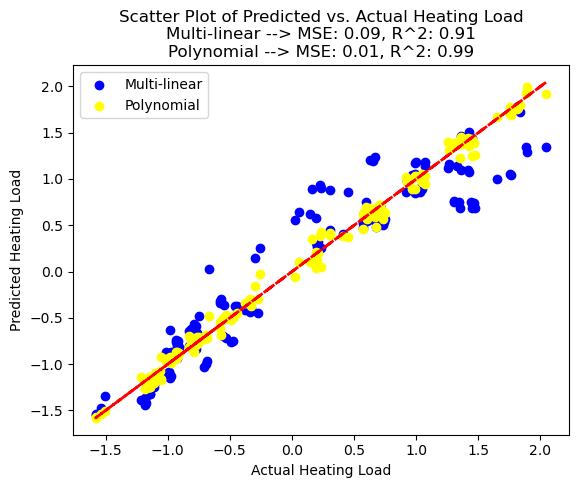

In [29]:
# Plot the results

plt.scatter(y_test, y_pred, label='Multi-linear', color='blue')
plt.scatter(y_test, y1_pred, label='Polynomial', color='yellow')
plt.plot(y_test, y_test, linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Scatter Plot of Predicted vs. Actual Heating Load\nMulti-linear --> MSE: {:.2f}, R^2: {:.2f}\nPolynomial --> MSE: {:.2f}, R^2: {:.2f}'.format(mse, r2, mse1, r21))
plt.legend()

# Polynomial Regression is performing better than Multi-linear Regression

plt.show()